Batch Gradient Descent VS Stochastic VS Mini-Batch

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("houseprice_bangalore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [16]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [17]:
def batch_gradient_descent(X,y_true,epochs,learning_rate):
     

     number_features = scaled_X.shape[1]
     samples = scaled_X.shape[0]
     w = np.ones(number_features)
     b=0
     cost_list=[]
     epoch_list=[]

     for i in range(epochs):

          y_predicted = np.dot(w,scaled_X.T)+b

          w_d = -(2/samples)*X.T.dot(y_true-y_predicted)
          b_d = -(2/samples)*np.sum(y_true-y_predicted)

          w = w-learning_rate*w_d
          b = b-learning_rate*b_d

          cost = np.mean(np.square(y_true-y_predicted))

          if i%20==0:
               cost_list.append(cost)
               epoch_list.append(i)
     
     return w,b,cost,cost_list,epoch_list




In [18]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),1000,0.01)
w,b,cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

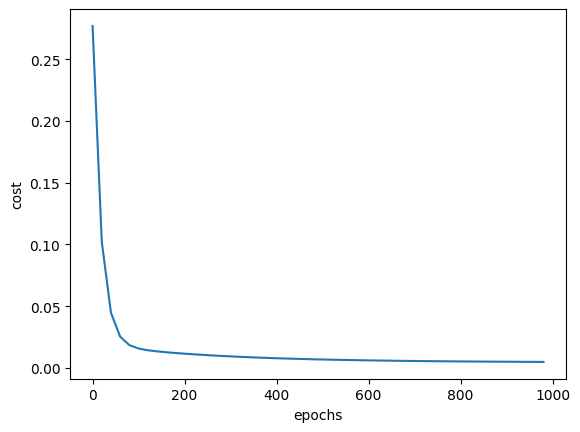

In [19]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [20]:
def predict(area,bedroom,w,b):
    scaled_X_p = sx.fit_transform([[1000,3]])[0]
    scaled_price = w[0]*scaled_X_p[0]+w[1]*scaled_X_p[1]+b
    return sy.inverse_transform([[scaled_price]])



In [21]:
import random
r = random.randint(0,6)
r

0

In [36]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate):
     

    number_features = scaled_X.shape[1]
    samples = scaled_X.shape[0]
    w = np.ones(number_features)
    b=0
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        sample_index = random.randint(0,samples-1)
        sample_x = X[sample_index]
        sample_y = y_true[sample_index]

        y_predicted = np.dot(w,sample_x.T)+b

        w_d = -(2/samples)*sample_x.T.dot(sample_y-y_predicted)
        b_d = -(2/samples)*(sample_y-y_predicted)

        w = w-learning_rate*w_d
        b = b-learning_rate*b_d

        cost = np.mean(np.square(sample_y-y_predicted))

        if i%20==0:
            cost_list.append(cost)
            epoch_list.append(i)
     
    return w,b,cost,cost_list,epoch_list
        

In [41]:
w,b,cost,cost_list,epoch_list = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),8000,0.01)
w,b,cost

(array([0.72826294, 0.69682118]), -0.2507016493561467, 0.03059252547906422)

In [58]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(1000,2,w,b)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


28.453371281829376

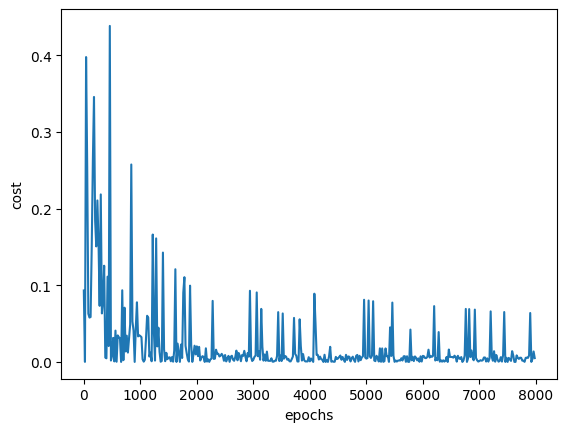

In [42]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [59]:
import numpy as np
import random

def mini_batch_gradient_descent(X, y_true, epochs, learning_rate, batch_size):
    number_features = X.shape[1]
    samples = X.shape[0]
    w = np.ones(number_features)
    b = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        sample_indices = random.sample(range(samples), batch_size)
        sample_x = X[sample_indices]
        sample_y = y_true[sample_indices]

        y_predicted = np.dot(w, sample_x.T) + b

        w_d = -(2 / batch_size) * sample_x.T.dot(sample_y - y_predicted)
        b_d = -(2 / batch_size) * np.sum(sample_y - y_predicted)

        w = w - learning_rate * w_d
        b = b - learning_rate * b_d

        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 20 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list


In [68]:
w,b,cost,cost_list,epoch_list = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),5000,0.01,6)
w,b,cost

(array([0.75109407, 0.41428312]), -0.11235198426856496, 0.004352831125960387)

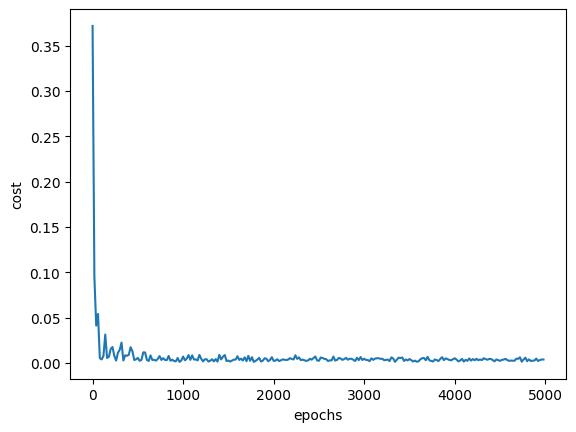

In [69]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)